<a href="https://colab.research.google.com/github/Lucasalvesdaluz/Portifolio_Analise_de_Dados/blob/main/Projeto_03_An%C3%A1lise_de_varia%C3%A7%C3%A3o_de_frequ%C3%AAncia_card%C3%ADaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Monitoramento de Atividades Cardíacas**
## **Descrição do Projeto**
Este projeto tem como foco a análise de dados de saúde coletados por dispositivos de Internet das Coisas (IoT), com ênfase na variação da frequência cardíaca ao longo do dia. A base de dados utilizada foi obtida no Kaggle e simula informações provenientes de sensores vestíveis (wearables) utilizados para monitorar continuamente os sinais vitais de pacientes em diferentes momentos.

## **Objetivo do Projeto**
A análise tem como objetivo investigar a forma como a frequência cardíaca varia ao longo do dia e identificar possíveis picos em determinados horários. Para isso, serão respondidos dois questionamentos centrais: “Como a frequência cardíaca muda ao longo do dia?” e “Há picos de batimentos em determinados horários?”. A ideia é compreender se há padrões temporais significativos que possam contribuir para o acompanhamento remoto da saúde do paciente, permitindo intervenções mais precisas com base nos dados registrados em tempo real pelos sensores.

## **Descrição da Base de Dados**
Essa base é composta por diversas colunas que representam variáveis clínicas e operacionais relevantes. Entre os principais campos estão: `Patient_ID`, que identifica exclusivamente cada paciente; `Timestamp`, que registra a data e hora de cada leitura; `Sensor_ID` e `Sensor_Type`, que indicam o sensor utilizado e seu tipo (como temperatura, pressão arterial ou frequência cardíaca); `Temperatura (°C)`; `Systolic_BP (mmHg)` e `Diastolic_BP (mmHg)`, que representam as pressões arteriais sistólica e diastólica; `Heart_Rate (bpm)`, que indica a frequência cardíaca; `Device_Battery_Level (%)` e `Battery_Level (%)`, que informam o nível de bateria do dispositivo; e variáveis de referência como `Target_Blood_Pressure`, `Target_Heart_Rate` e `Target_Health_Status`, que fornecem metas ou limites esperados para o monitoramento de cada paciente.

**Link da Base de Dados no Kaggle:** https://www.kaggle.com/datasets/ziya07/healthcare-iot-data

## **1. Importando bases de dados**

A primeira coisa que vamos fazer é importar as bibliotecas que serão utilizadas em nossa análise. Estaremos trabalhando com a biblioteca pandas e matplotlib do python.

Vamos aproveitar e importar nosso dataframe também.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/healthcare_iot_target_dataset.csv')

## **2. Alterando tipo**
Nosso objetivo, é entender se existem picos de batimentos cardíacos em determinados horários. Para isso, precisamos começar trabalhando com a coluna `Timestamp`, responsável por registrar a data e a hora de cada leitura. Ela precisa estar no formato datetime. Porém, verficiando o resultado do código a baixo, veremos que ela ainda não se encontra nesse formato.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                200 non-null    int64  
 1   Timestamp                 200 non-null    object 
 2   Sensor_ID                 200 non-null    int64  
 3   Sensor_Type               200 non-null    object 
 4   Temperature (°C)          200 non-null    float64
 5   Systolic_BP (mmHg)        200 non-null    float64
 6   Diastolic_BP (mmHg)       200 non-null    float64
 7   Heart_Rate (bpm)          200 non-null    float64
 8   Device_Battery_Level (%)  200 non-null    int64  
 9   Target_Blood_Pressure     200 non-null    float64
 10  Target_Heart_Rate         200 non-null    float64
 11  Target_Health_Status      200 non-null    object 
 12  Battery_Level (%)         200 non-null    int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 20.4+ KB


O que precisamos fazer, então, é converter a coluna `Timestamp` para o padrão datetime.

Veja isso na prática no código a baixo:

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

## **3. Calculando a média de batimentos cardíacos por hora**

Nosso próximo passo, é criar uma coluna que contenha os horários de cada registro da coluna `Timestamp`.

Vamos chamar essa coluna de `hour`.

In [ ]:
df['hour'] = df['Timestamp'].dt.hour

Agora precisamos calcular a média de batimentos cardíacos por hora e salvar esssa informação em uma variável, a qual vamos chamar de `mean_hr_by_hour`.

Vamos fazer isso usando a função `groupby()`.

In [ ]:
mean_hr_by_hour = df.groupby('hour')['Heart_Rate (bpm)'].mean()
mean_hr_by_hour

## **4. Análise e Visualização dados**
Nessa etapa, vamos visualizar a média de batimentos cardíacos por hora em um gráfico de linhas. Isso será feito utilizando a biblioteca matplotlib. Em seguida, vamos observar o gráfico e tentar chegar a algumas conclusões.

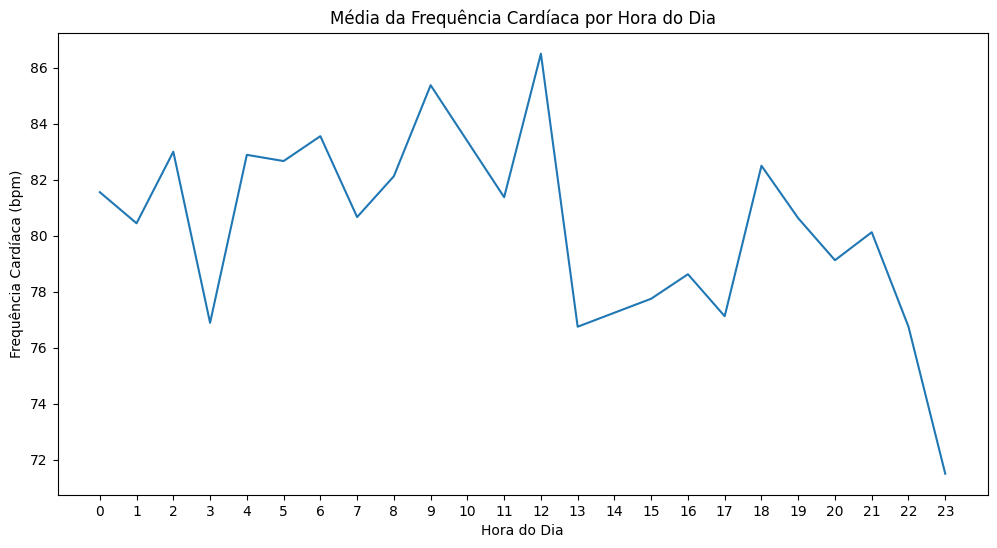

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(mean_hr_by_hour.index, mean_hr_by_hour.values)
plt.title('Média da Frequência Cardíaca por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Frequência Cardíaca (bpm)')
plt.xticks(range(0, 24))
plt.show()

Com base no gráfico a cima, é possível observar que a frequência cardíaca apresenta variações significativas ao longo do dia, refletindo padrões fisiológicos e comportamentais do corpo humano.

Através da visualização gráfica e da análise estatística, identificamos uma tendência de **frequência cardíaca mais baixa durante a madrugada e início da manhã**, o que está alinhado com o ciclo circadiano, momento em que o corpo entra em estado de repouso. À medida que o dia avança, especialmente entre **11h e 14h, ocorre um aumento perceptível nos batimentos cardíacos**, possivelmente associado a atividades físicas, alimentação ou maior nível de estresse e movimento. **Outro pico menos intenso pode ser notado no fim da tarde**, o que pode estar relacionado ao retorno de atividades após uma pausa ou ao início de exercícios físicos.

## **5. Conclusão**
Portanto, a frequência cardíaca não se mantém constante ao longo do dia, e sim acompanha os ritmos biológicos e comportamentais do indivíduo. Concluímos que existem sim horários específicos com picos de batimentos cardíacos, o que reforça a importância do monitoramento contínuo para identificar padrões, prevenir eventos adversos e personalizar estratégias de saúde baseadas em dados.